You have explored and analyzed customer data collected by the Adventure Works Cycles company. Now you should be ready to apply what you have learned about the data to building, testing, and optimizing a predictive machine learning model.  

Specifically, you must use any combination of Azure Machine Learning, R or Python to create a classification model that predicts whether or not a new customer will buy a bike.  

## Challenge Instructions  
To complete this challenge:  

1. Use the Adventure Works Cycles customer data you worked with in challenge 1 to create a classification model that predicts whether or not a customer will purchase a bike. The model should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchases is available.
2. Download the test data. This data includes customer features but does not include bike purchasing or average monthly spend values.
3. Use your model to predict the corresponding test dataset. Don't forget to apply what you've learned throughout this course.
4. Go to the next page to check how well your prediction against the actual result.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

In [2]:
# Reading the training set
Demographics = pd.read_csv('Demographics.csv')
Demographics.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Bikebuyer,AveMonthSpend,Ages,AgeGroup,CarGroup,Children
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,0,0,2,137947,0,89,31.735080,Group_2,No_car,No_children
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1,3,3,101141,1,117,32.635852,Group_2,1-2,With_Children
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1,3,3,91945,0,123,32.389440,Group_2,1-2,With_Children
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1,0,0,86688,0,50,29.878779,Group_2,1-2,No_children
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,4,5,5,92771,1,95,29.399645,Group_2,3 or more,With_Children


In [3]:
# Reading the test set
TestSet = pd.read_csv('TestSet.csv')
TestSet.head(5)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Ages,AgeGroup,CarGroup,Children
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,S,0,2,0,5,86931,52.989452,Group_3,1-2,No_children
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,M,1,2,2,4,100125,33.243667,Group_2,1-2,With_Children
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,M,1,2,0,4,103985,63.971197,Group_4,1-2,No_children
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,M,1,0,0,4,127161,39.278014,Group_2,No_car,No_children
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,M,1,1,2,2,21876,32.789174,Group_2,1-2,With_Children


In [4]:
Demographics.dtypes

CustomerID                int64
Title                    object
FirstName                object
MiddleName               object
LastName                 object
Suffix                   object
AddressLine1             object
AddressLine2             object
City                     object
StateProvinceName        object
CountryRegionName        object
PostalCode               object
PhoneNumber              object
BirthDate                object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
Bikebuyer                 int64
AveMonthSpend             int64
Ages                    float64
AgeGroup                 object
CarGroup                 object
Children                 object
dtype: object

I will delete innecesary columns as the first

In [5]:
Discard = ['CustomerID','Title','FirstName','MiddleName', 'LastName', 'Suffix', 'AddressLine1','AddressLine2','City','StateProvinceName','PostalCode','PhoneNumber','BirthDate']
Demographics_reduced = Demographics.drop(Discard, axis=1)
# Test set
TestSet_reduced = TestSet.drop(Discard, axis=1)
Demographics_reduced.head(10)

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Bikebuyer,AveMonthSpend,Ages,AgeGroup,CarGroup,Children
0,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,0,89,31.735080,Group_2,No_car,No_children
1,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,1,117,32.635852,Group_2,1-2,With_Children
2,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,0,123,32.389440,Group_2,1-2,With_Children
3,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,0,50,29.878779,Group_2,1-2,No_children
4,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,1,95,29.399645,Group_2,3 or more,With_Children
5,Australia,Bachelors,Professional,M,S,1,1,0,0,103199,1,78,32.408605,Group_2,1-2,No_children
6,Australia,Bachelors,Professional,F,S,1,1,0,0,84756,1,54,32.071843,Group_2,1-2,No_children
7,Australia,Bachelors,Professional,M,M,1,2,3,3,109759,1,130,33.648877,Group_2,1-2,With_Children
8,Australia,Bachelors,Professional,F,S,1,3,4,4,88005,1,85,33.487341,Group_2,3 or more,With_Children
9,Australia,Bachelors,Professional,M,S,0,1,0,0,106399,0,74,33.752918,Group_2,1-2,No_children


In [6]:
Demographics_reduced.dtypes

CountryRegionName        object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
Bikebuyer                 int64
AveMonthSpend             int64
Ages                    float64
AgeGroup                 object
CarGroup                 object
Children                 object
dtype: object

In [7]:
TestSet_reduced.dtypes

CountryRegionName        object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag             int64
NumberCarsOwned           int64
NumberChildrenAtHome      int64
TotalChildren             int64
YearlyIncome              int64
Ages                    float64
AgeGroup                 object
CarGroup                 object
Children                 object
dtype: object

I will check if there are wrong cells

In [8]:
(Demographics_reduced.astype(np.object) == '?').any() # ?,NaN, etc

CountryRegionName       False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
Bikebuyer               False
AveMonthSpend           False
Ages                    False
AgeGroup                False
CarGroup                False
Children                False
dtype: bool

In [9]:
(TestSet_reduced.astype(np.object) == '?').any() # ?,NaN, etc

CountryRegionName       False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
Ages                    False
AgeGroup                False
CarGroup                False
Children                False
dtype: bool

In [10]:
print(Demographics_reduced.shape)
print(TestSet_reduced.shape)

(16404, 16)
(500, 14)


The difference in columns is because I added the AveMonthSpend and Bikebuyer in the Demographics

## Examine classes and class imbalance
Lets make a frecquency table

In [11]:
def frequency_table(data, cols):
    """
    Builds a frequency table for the specific columns of the data
    """
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())


frequency_table(Demographics_reduced, Demographics_reduced.columns)


For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

For column NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

For column NumberChildrenAtHome
0    9924
1    2180
2    1455
3    1057
4     943
5     84

- Country is a bit imbalanced as the USA has 6K and Canada 1K.
- Home Owner is also imbalanced 1->11K 0->5387
- Number of cars owned is imbalanced, so I will keep the CarGroup
- Ages are very sparsed while (make a histogram) to see how to balance them, as in the division that I made before, age group 2 it is imbalanced
- Number of cars is imbalances but I will stick to the group
- NUmber of children is well represented with the groups
- Is total children related to Number of children (Explore this)
- There is class imbalance in the BikeBuyer, so probably I have to undersample the non-buyers

## Visualize class separation by categorical features
**Ideally, a categorical feature will have very different counts of the categories for each of the label values**

['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'AgeGroup', 'CarGroup', 'Children']
['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Bikebuyer', 'AveMonthSpend', 'Ages']
Lets analyse the CountryRegionName


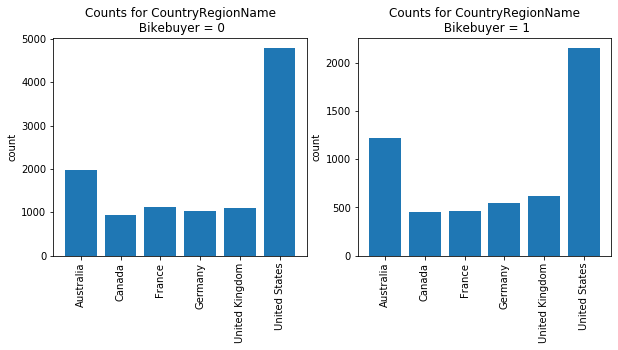

Lets analyse the Education


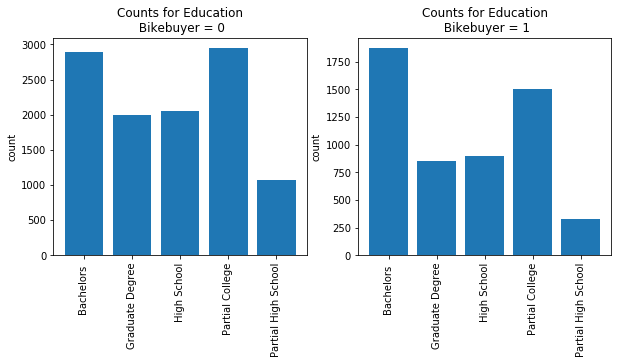

Lets analyse the Occupation


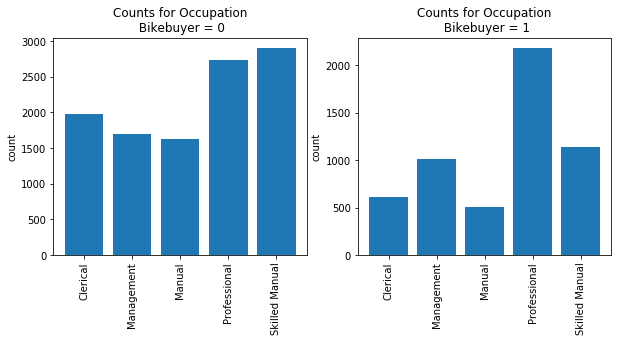

Lets analyse the Gender


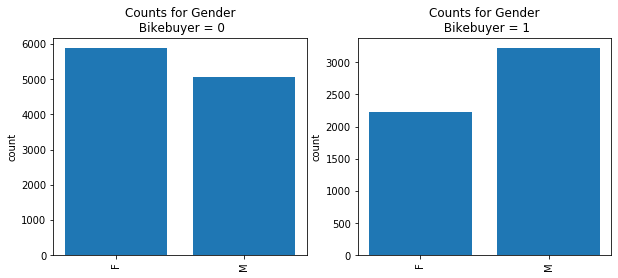

Lets analyse the MaritalStatus


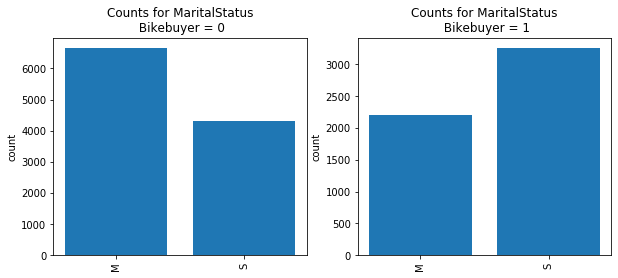

Lets analyse the AgeGroup


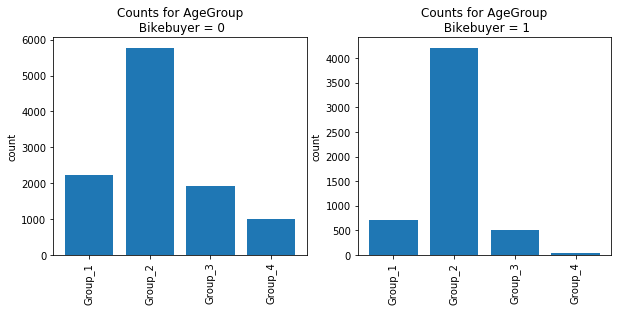

Lets analyse the CarGroup


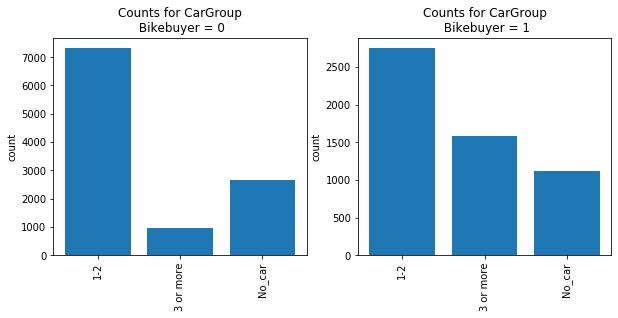

Lets analyse the Children


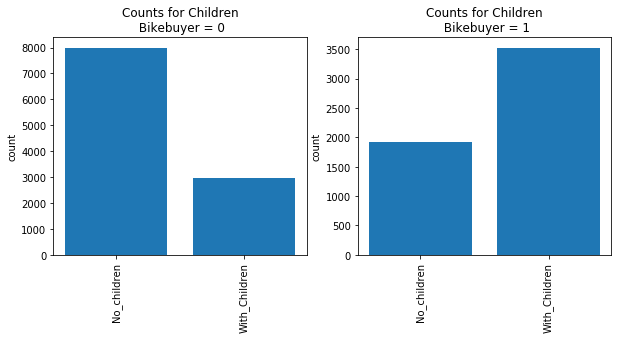

In [12]:
# Define which are the categorical variables
cat_cols = [x  for x in Demographics_reduced.columns if pd.api.types.is_string_dtype(Demographics_reduced[x])]
print(cat_cols)

# Define which are the Numerical variables
numeric_cols = [x  for x in Demographics_reduced.columns if pd.api.types.is_numeric_dtype(Demographics_reduced[x])]
print(numeric_cols)

# We need to create a dummy variable to differenciate the count for buyers and not
def class_separation_categorical(df, cat_cols, label):
    """ 
    df is the dataframe
    cat_cols are the categorical columns
    label has the label (the one that has to be predicted eventually)
    """
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in cat_cols:
        print("Lets analyse the %s"%col)
        counts = df[['dummy', label, col]].groupby([label, col], as_index = False).count()
        temp = counts[counts[label] == 0][[col, 'dummy']]
        _ = plt.figure(figsize = (10,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts[label] == 0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n %s = 0'%label)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        temp = counts[counts[label] == 1][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n %s = 1'%label)
        plt.ylabel('count')
        plt.show()
    df = df.drop("dummy", axis=1)
        
class_separation_categorical(Demographics_reduced, cat_cols, "Bikebuyer")

    

Based on that I will delete countries, age group is in the borderline.
Count of children is very clear

## Visualize class separation by numeric features


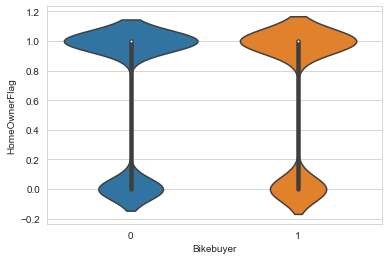

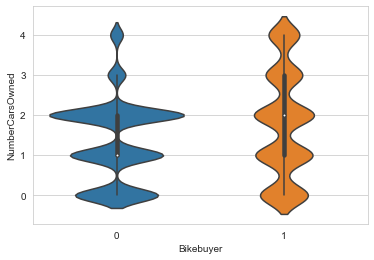

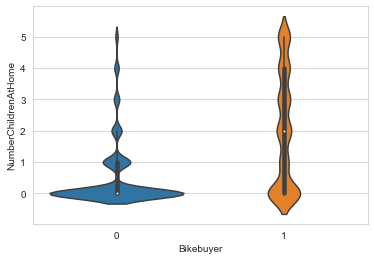

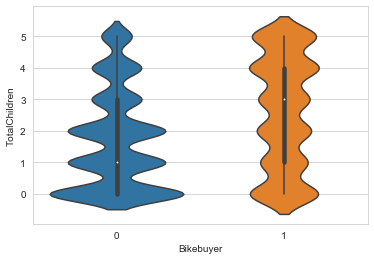

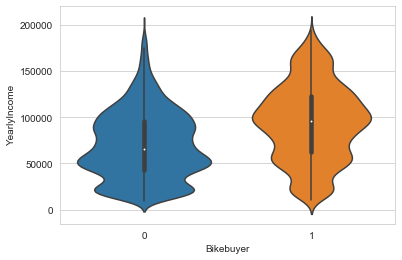

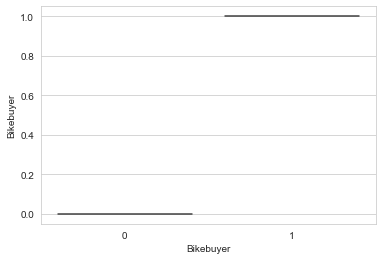

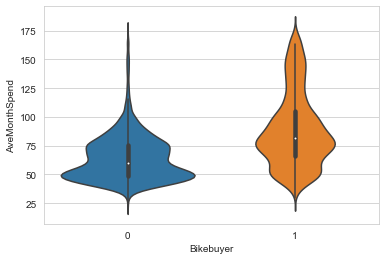

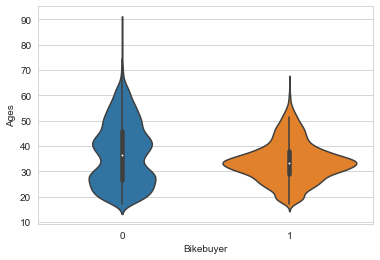

In [13]:
def plot_violin(df, cols, label):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(label, col, data=df)
        plt.xlabel(label) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(Demographics_reduced, numeric_cols, "Bikebuyer")

## Scatter plots (Numerical)

To analyse the average month spend for buyers and non buyers

[0 1]


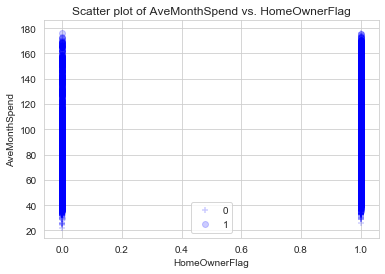

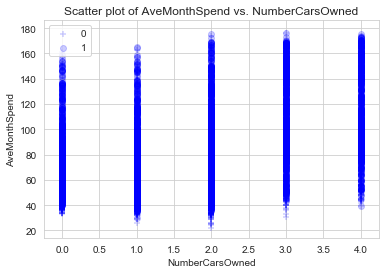

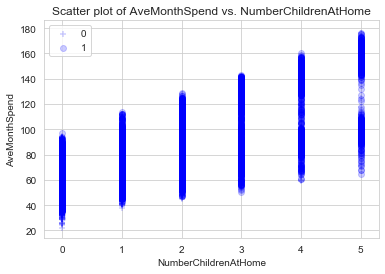

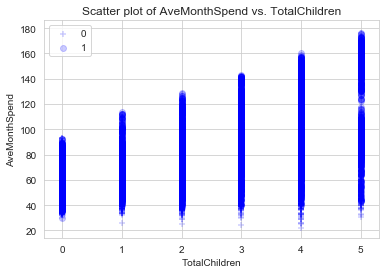

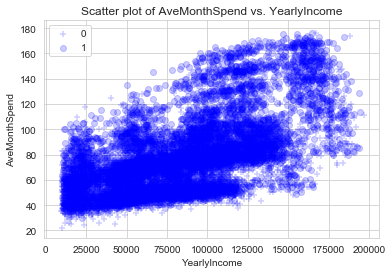

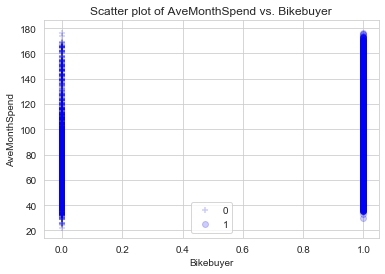

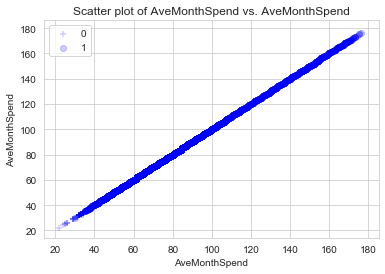

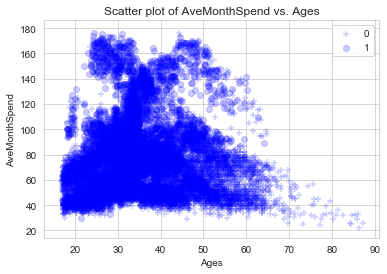

In [14]:
def plot_scatter(df, cols, hue, col_y, alpha = 0.2):
    """
    df dataframe
    cols numerical columns to analyse
    hue categorical variable
    col_y y axis
    """
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = df[hue].unique()
    print(unique_cats)
    df[hue].value_counts()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[hue] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
plot_scatter(Demographics_reduced, numeric_cols, 'Bikebuyer', 'AveMonthSpend')       

## Violin for categorical

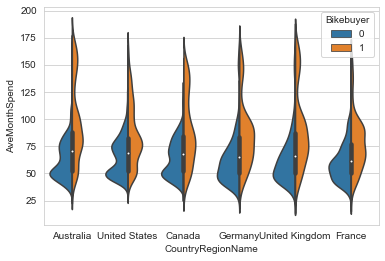

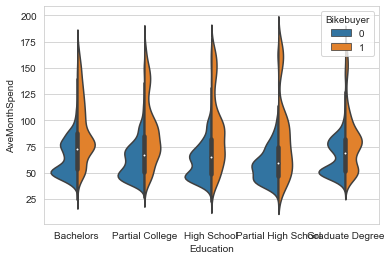

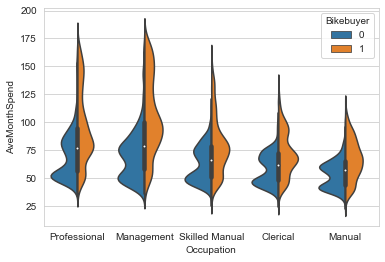

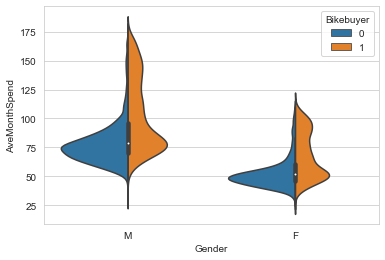

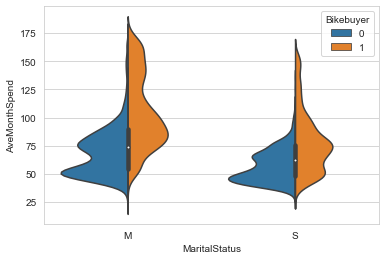

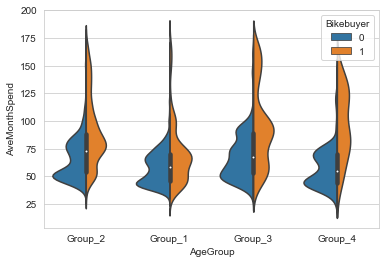

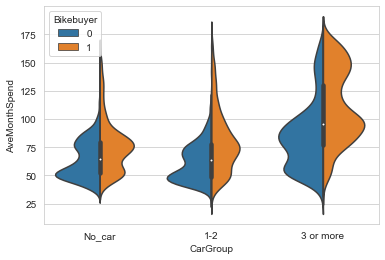

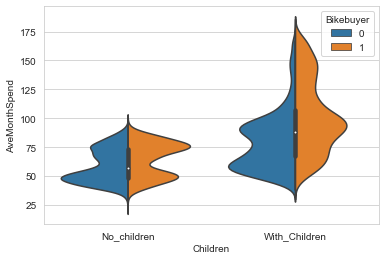

In [15]:
def plot_violin_hue(df, cols, col_y, hue_col):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=df, hue = hue_col, split = True)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin_hue(Demographics_reduced, cat_cols,'AveMonthSpend', 'Bikebuyer')    

I will delete **Country** from the Categorical variables and **Home_owner** from the  numerical features. Also, here I will decide if I keep the Numerical features (age, N cars, N of Children) or the Groupped categorical. This is also done in using the frequency table.

- Age vs AgeGroup (I will leave the group)
- Number of CarOwned (I will leave the group)
- Number of Children at home (I will leave the group).

**I removed the Total number of children but I will keep it**



In [16]:
Discard = ['HomeOwnerFlag','CountryRegionName', 'Ages', 'NumberCarsOwned', 'NumberChildrenAtHome','dummy']
Demographics_reduced = Demographics_reduced.drop(Discard, axis=1)
Demographics_reduced.head(10)

Discard = ['HomeOwnerFlag','CountryRegionName', 'Ages', 'NumberCarsOwned', 'NumberChildrenAtHome']
TestSet_reduced = TestSet_reduced.drop(Discard, axis=1)

In [17]:
TestSet_reduced.head(10)

,Education,Occupation,Gender,MaritalStatus,TotalChildren,YearlyIncome,AgeGroup,CarGroup,Children
0,Bachelors,Management,F,S,5,86931,Group_3,1-2,No_children
1,Bachelors,Skilled Manual,M,M,4,100125,Group_2,1-2,With_Children
2,Graduate Degree,Management,F,M,4,103985,Group_4,1-2,No_children
3,Graduate Degree,Skilled Manual,M,M,4,127161,Group_2,No_car,No_children
4,High School,Manual,F,M,2,21876,Group_2,1-2,With_Children
5,Partial College,Clerical,F,M,1,44467,Group_2,1-2,No_children
6,Bachelors,Skilled Manual,M,S,4,77702,Group_2,1-2,With_Children
7,Bachelors,Professional,M,M,4,99418,Group_2,3 or more,With_Children
8,Partial High School,Manual,M,S,4,13522,Group_2,1-2,With_Children
9,Bachelors,Skilled Manual,F,M,1,46264,Group_1,1-2,With_Children


## Preparing AveMonthSpend and Bikebuyer

In [18]:
BikeBuyer = Demographics_reduced['Bikebuyer']
AveMonthSpend = Demographics_reduced['AveMonthSpend']

Demographics_reduced = Demographics_reduced.drop(['Bikebuyer','AveMonthSpend'], axis = 1)
Demographics_reduced.head(10)


,Education,Occupation,Gender,MaritalStatus,TotalChildren,YearlyIncome,AgeGroup,CarGroup,Children
0,Bachelors,Professional,M,M,2,137947,Group_2,No_car,No_children
1,Bachelors,Professional,M,S,3,101141,Group_2,1-2,With_Children
2,Bachelors,Professional,M,M,3,91945,Group_2,1-2,With_Children
3,Bachelors,Professional,F,S,0,86688,Group_2,1-2,No_children
4,Bachelors,Professional,F,S,5,92771,Group_2,3 or more,With_Children
5,Bachelors,Professional,M,S,0,103199,Group_2,1-2,No_children
6,Bachelors,Professional,F,S,0,84756,Group_2,1-2,No_children
7,Bachelors,Professional,M,M,3,109759,Group_2,1-2,With_Children
8,Bachelors,Professional,F,S,4,88005,Group_2,3 or more,With_Children
9,Bachelors,Professional,M,S,0,106399,Group_2,1-2,No_children


In [19]:
# Exporting the data
Demographics_reduced.to_csv('Demographics_reduced.csv', index = False, header = True)
TestSet_reduced.to_csv("TestSet_reduced.csv",index = False, header = True )
BikeBuyer.to_csv("BikeBuyer_reduced.csv",index = False, header = True )
AveMonthSpend.to_csv("AveMonthSpend_reduced.csv",index = False, header = True )

**Copy all the data "reduced" to the next folder**

Notice, that the best way is to copy the results into a new excel sheet and from there copy into the assesment excel sheet.